## **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

sns.set_style('whitegrid')
%matplotlib inline

## **2. Import Dataset**

In [2]:
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

### Data Description - 


In [3]:
print("Training Data")
train_df.head()

Training Data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Test Data")
test_df.head()

Test Data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Train Data Shape :")
train_df.shape

Train Data Shape :


(891, 12)

In [6]:
print("Test Data Shape:")
test_df.shape

Test Data Shape:


(418, 11)

In [7]:
#check the data description
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Conclusion-**
This dataset is balanced.

### **Train Dataset Info -**
- Shape - (891,12)
- Numerical Features - 7
- Categorical Features - 5
- Null Values : Age - 177     Cabin - 687    Embarked - 2

### **Test Dataset Info -**
- Shape - (418,11)
- Numerical Features - 6
- Categorical Features - 5
- Null Values : Age - 86     Cabin - 327    Fare - 1

## **3. Exploratory Data Analysis**

### 3.1 Relationship of Class with Survival of Passenger 

Text(0.5, 1.0, 'Number of People Surviving or Not of different Class')

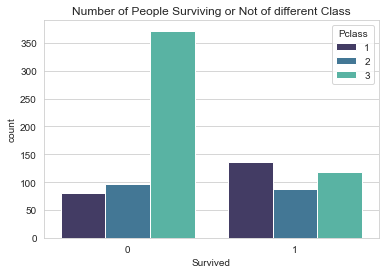

In [14]:
sns.countplot(hue='Pclass', x='Survived', data=train_df, palette='mako')
plt.title('Number of People Surviving or Not of different Class')

#### Conclusion
- We can see here that majority of passengers who **didn't survive** belonged to **Class 3**
- **Majority** of passengers from **Class 1 survived**

### 3.2 Relationship of Gender with Survival of Passenger 

Text(0.5, 1.0, 'Number of People Surviving or Not of different Gender')

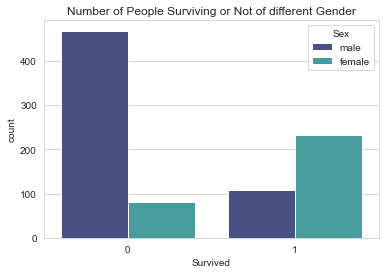

In [15]:
sns.countplot(hue='Sex', x='Survived', data=train_df, palette="mako")
plt.title('Number of People Surviving or Not of different Gender')

#### **Conclusion-**
- We can see here that **females survived more as compared to males**.

### 3.3 Distribution of Passengers Age 

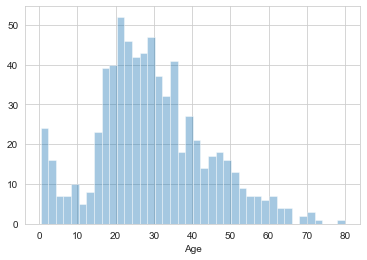

In [16]:
sns.distplot(train_df['Age'].dropna(),kde=False,bins=40)

#### **Conclusion-**
- We can see here that **most of the passengers onboard are of age 18-40**
- **Highest number** of passengers are of **age 20**

### 3.4 Distribution of Passenger Age (Separately for those who survived and who didn't)

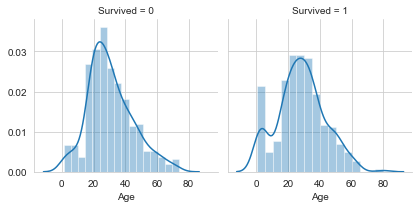

In [17]:
g = sns.FacetGrid(train_df, col='Survived')
g = g.map(sns.distplot, "Age")

#### **Conclusion-**
- We can see here that **majority of older people didn't survive.**
- Most of the **infants survived**.


### 3.5 Relationship of Survival with SibSp (sibling/spouse) 

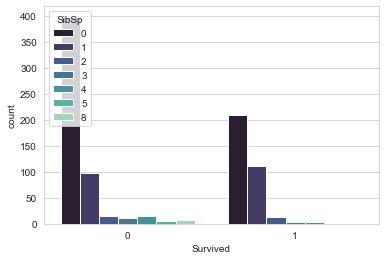

In [18]:
sns.countplot(x='Survived', hue='SibSp', data=train_df, palette="mako")

### 3.6 Relationship of Survival with Parch (parent/children)

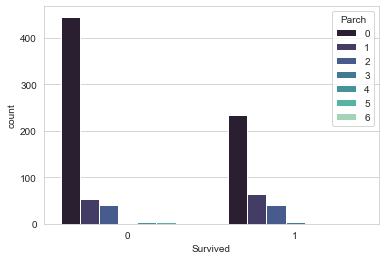

In [19]:
sns.countplot(x='Survived', hue='Parch', data=train_df, palette="mako")

#### **Conclusion-**
From above two visualisations we can conclude that passengers with **smaller family size survived more**.

### **3.7 Check the distribution of Fare**

Text(0.5, 0, 'Fare')

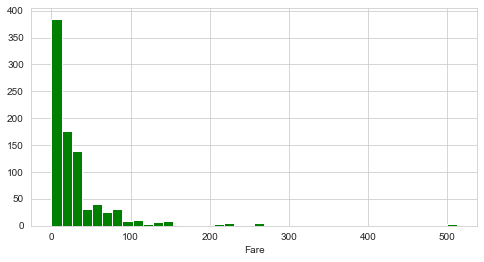

In [20]:
train_df['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.xlabel('Fare')

#### **Conclusion -**
This shows count for different ranges of Fare.

### **3.8 Check correlation of different features with Target Variable**

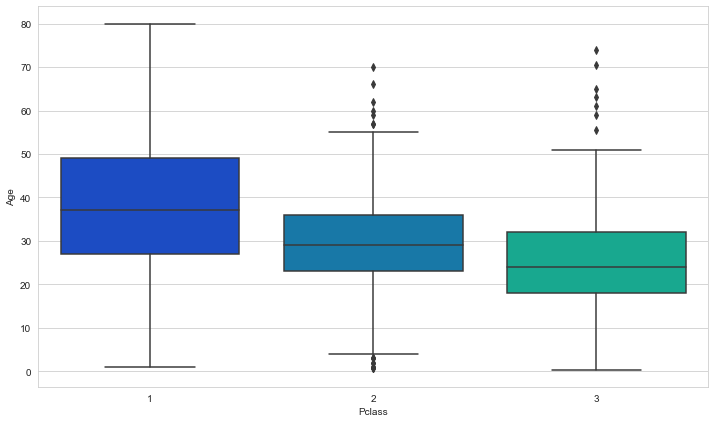

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

#### **Conclusion-**
We can see the **wealthier passengers in the higher classes tend to be older**, which makes sense. We can use these average age values to impute based on Pclass for Age.

### **3.9 Check correlation of different features with Target Variable**

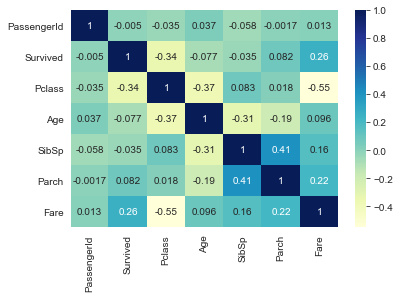

In [22]:
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True) 

## **4. Data Preprocessing**

### 4.1 Handling Missing Values For Train Set

**Age** column has 177 missing values, so we can **replace** it with **Mean Value of Age**.

In [23]:
def age_null(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    return df
train_df = age_null(train_df)

In [24]:
uniques = train_df['Cabin'].unique()
len(uniques)

148

In column **Cabin**, there are **148 distinct** values and **687 null** values. So, it is **tough to decide the replacement value**. It will be **better** if we **drop this column**.

In [25]:
train_df = train_df.drop("Cabin", axis=1)

In case of **Embarked** column, there are only **2 null values** present, so we can replace null values with **mode of that column**.

In [26]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [27]:
# check if any null value present 
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.1 Handling Missing Values For Test Set

**Age** column has 86 missing values, so we can **replace** it with **Mean Value of Age**.

In [28]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In case of **Cabin** column, there are **327 null values** present, and we dropped this column in train set, so dropping it here as well.

In [29]:
test_df = test_df.drop("Cabin", axis=1)

In case of **Fare** column, there is only **1 null value** present, so we can replace it with **mean of that column**.

In [30]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [31]:
#check if any null value present
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.2 Feature Selection

- We can see that features - **PassengerId** has high cardinality, so we can drop it.
- We can drop **Name** and **Ticket** columns as well.

In [32]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

### 4.3 Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

- Convert **Sex** and **Embarked** (categorical) columns into numeric data type

In [34]:
train_df['Sex'] = lb.fit_transform(train_df['Sex'])
test_df['Sex'] = lb.fit_transform(test_df['Sex'])

In [35]:
train_df['Embarked'] = lb.fit_transform(train_df['Embarked'])
test_df['Embarked'] = lb.fit_transform(test_df['Embarked'])

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


## **5. Train/Test split**

In [38]:
y = train_df.pop('Survived')
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
x = train_df
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [41]:
X_train.shape

(712, 7)

In [42]:
X_test.shape

(179, 7)

**Note -**
Since there is not a wide range in numeric features, we need not to scale them.

## **6. Model Building**

### **6.1 Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=500)

In [44]:
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [45]:
y_pred = LogReg.predict(X_test)

In [46]:
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

Accuracy Score :  0.8324022346368715


### **6.2 Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier()

In [48]:
DecTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred = DecTree.predict(X_test)

In [50]:
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

Accuracy Score :  0.8491620111731844


### **6.3 KNeighbours**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNeigh = KNeighborsClassifier(n_neighbors=10)

In [52]:
KNeigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
y_pred = KNeigh.predict(X_test)

In [54]:
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

Accuracy Score :  0.7653631284916201


### **6.4 SVM**

In [55]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')

In [56]:
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
y_pred = SVM.predict(X_test)

In [58]:
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

Accuracy Score :  0.8100558659217877


### **6.5 Random Forest Classifier**

In [59]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [60]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_pred = RFC.predict(X_test)

In [62]:
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

Accuracy Score :  0.8044692737430168


### **6.6 XGBoost Classifier**

In [63]:
from xgboost import XGBClassifier
XGB = XGBClassifier()

In [64]:
XGB.fit(X_train, y_train)

C:\Users\devan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred = XGB.predict(X_test)

In [66]:
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

Accuracy Score :  0.8435754189944135


**Conclusion -**

- Here we can conclude that for Training Set, **Decision Tree** is giving the best accuracy score **0.8491** while, **XGBoost** gives accuracy score **0.8435**.

## **7. Hyperparameter Tuning**

### **7.1 For Decision Tree**

In [67]:
params={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
grid = GridSearchCV(DecTree, param_grid=params, cv=10, verbose=1, n_jobs=-1)

In [70]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 5680 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   18.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [71]:
DecTree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [72]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [73]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)

In [74]:
grid.best_score_

0.8229655712050079

### **7.2 For XGBClassifier**

In [75]:
params={
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [76]:
random = RandomizedSearchCV(XGB, param_distributions=params, cv=10, verbose=1, n_jobs=-1)

In [77]:
random.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s


[01:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished
C:\Users\devan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_p...ee=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           sc

In [78]:
random.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [79]:
random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
random.best_score_

0.821537558685446

**Conclusion -**
- We can see here that, by tuning hyperparameters the accuracy score for both the models was decreasing. So, we won't perform tuning of hyperparameters.

- We will choose **XgBoost Classifier as our final model**.

### **7.3 Final Model**

In [81]:
model = XGBClassifier()
model.fit(X_train, y_train)

[01:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred = model.predict(test_df)

In [83]:
test = pd.read_csv('Data/test.csv')

### **7.4 Creating Prediction File**

In [84]:
data = {'PassengerId': test['PassengerId'], 'Survived': y_pred}
pred_df = pd.DataFrame(data, columns=['PassengerId', 'Survived'] )

In [87]:
pred_df['Survived'] = pred_df['Survived'].apply(int)

In [90]:
pred_df.to_csv('prediction_file.csv', index = False)